# Build a Neural Netwrok for multi-classification of IRIS types

In [3]:
# for reading data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Load our data
- We use Iris Species as the example dataset

- Read the dataset
- Shuffle the dataset

In [5]:
# read in the data
iris_data = pd.read_csv("C:/Users/hp/Downloads/Iris.csv")
print(iris_data.head(5))

# shuffle the dataset to prevent the model from learning any patterns that might exist in the order of the data.! 
iris_data = iris_data.sample(frac=1).reset_index(drop=True)
print("\n\nafter suffle ===>")
print(iris_data.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


after suffle ===>
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0   4            4.6           3.1            1.5           0.2   
1  20            5.1           3.8            1.5           0.3   
2  25            4.8           3.4            1.9           0.2   
3  99            5.1           2.5            3.0           1.1   
4  14            4.3           3.0            1.1           0.1   

           Species  
0      Iris-setosa  
1      Iris-setosa  
2      Iris-setosa  
3  Iris-versicolor  
4      Iri

# Prepare data for modeling
- Split the data(X,y)
- Convert to NumPy array
- Encode class values as integers


In [7]:
# split into X and Y
Y = iris_data['Species']
X = iris_data.drop(['Species', 'Id'], axis=1)

print(X.shape)
print(Y.shape)

# convert X to numpy arrays
X = np.array(X)

(150, 4)
(150,)


In [36]:
# show Y
print(Y)

# encode class values as integers
Y = Y.replace({'Iris-setosa':0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
print('\n\nAfter encoding ===>')
print(Y)

dummy = np_utils.to_categorical(Y)

0      0
1      0
2      0
3      1
4      0
      ..
145    1
146    0
147    2
148    0
149    2
Name: Species, Length: 150, dtype: int64


After encoding ===>
0      0
1      0
2      0
3      1
4      0
      ..
145    1
146    0
147    2
148    0
149    2
Name: Species, Length: 150, dtype: int64


# Build, Compile, Fit model
- Use the Sequential API to build your model
- Specify an optimizer (rmsprop or Adam)
- Set a loss function (categorical_crossentropy)
- EarlyStopping callbacks to prevent overfitting (patience of 10)
- Fit the model (make a new variable called ‘history’ so you can evaluate the learning curves)

In [37]:
# build a model with 1 or 2 layers and get summary of the model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

# compile the model for multi-class classification
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                80        
                                                                 
 dense_16 (Dense)            (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [38]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_loss', 
                                   mode='auto',
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call with 80/20 split
history = model.fit(X,
                    dummy,
                    callbacks=[es],
                    epochs=10,
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/10
12/12 [==============================] - 1s 17ms/step - loss: 1.4989 - accuracy: 0.3250 - val_loss: 1.2457 - val_accuracy: 0.3667
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 1.3153 - accuracy: 0.3250 - val_loss: 1.1344 - val_accuracy: 0.3667
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 1.1959 - accuracy: 0.3250 - val_loss: 1.0531 - val_accuracy: 0.3667
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 1.1027 - accuracy: 0.3250 - val_loss: 0.9874 - val_accuracy: 0.3667
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 1.0217 - accuracy: 0.3250 - val_loss: 0.9248 - val_accuracy: 0.3667
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 0.9490 - accuracy: 0.3417 - val_loss: 0.8811 - val_accuracy: 0.4333
Epoch 7/10
12/12 [==============================] - 0s 4ms/step - loss: 0.8997 - accuracy: 0.5083 - val_loss: 0.8466 - val_accuracy: 0.7333
Epoch 8/10
12/12 [=

# Evaluate the Model
- Learning curves (Loss)
- Learning curves (Accuracy)
- Confusion matrix

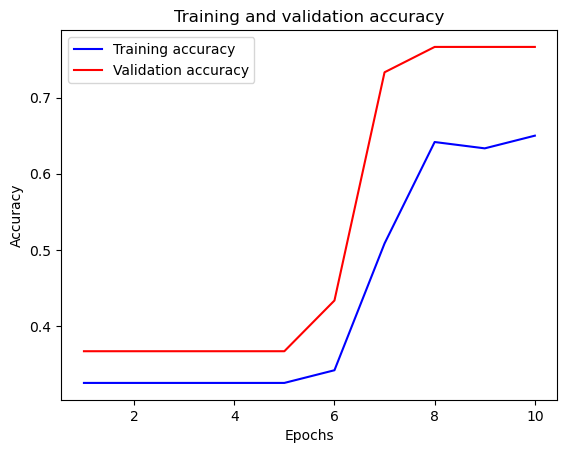

In [39]:
import matplotlib.pyplot as plt

history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot training and validation accuracy
# "r" is for "solid red line"
# b is for "solid blue line"
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#see how the model did!
model.predict(X)
np.round(model.predict(X),0)
Y

preds = np.round(model.predict(X),0)

#print(confusion_matrix(Y, preds))

5/5 [==============================] - 0s 1ms/step


In [45]:
# more detail on how well things were predicted
print(classification_report(dummy, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.96      0.90      0.93        50

   micro avg       0.96      0.30      0.46       150
   macro avg       0.32      0.30      0.31       150
weighted avg       0.32      0.30      0.31       150
 samples avg       0.30      0.30      0.30       150



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
